# The Central Limit Theorem - A first approach

## 🔢  2) The Dataset

👉 In this challenge, we will use the `tips` dataset from the `seaborn` library to illustrate the Central Limit Theorem.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 🧐  2.1) Exploratory Data Analysis (EDA)

❓ How many rows are available in the dataset ❓

In [3]:
len(tips_df)

244

❓ Plot the distribution of the `tip` column 📊 (with 20 bins) ❓

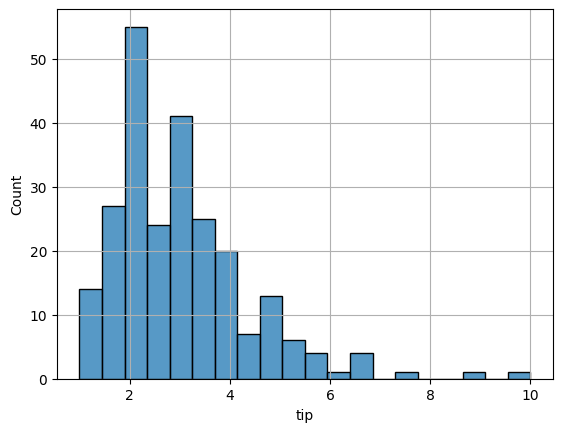

In [4]:
sns.histplot(tips_df["tip"],bins=20)
plt.grid(True)
plt.show();

❓ Question 1 ❓

What are :
* the ***average tip***
* the ***standard deviation tip*** 
* the  [***skewness of the tips***](https://en.wikipedia.org/wiki/Skewness)

of the tips? 

Store them into three variables called respectively `tips_mu`, `tips_sigma` and `tips_skew`

In [5]:
tips = tips_df["tip"]
tips_mu = tips.mean()
print(tips_mu)
tips_sigma = tips.std()
print(tips_sigma)
tips_skew = tips.skew()
print(tips_skew)

2.99827868852459
1.3836381890011822
1.4654510370979401


❓ Question 2 ❓

What is the skewness of the tips: left, right, non-skewed? Store your answer in a string variable called `skewness`

In [6]:
if tips_skew < -1:
    skewness = "left"
elif tips_skew > 1:
    skewness = "right"
else:
    skewness = "non-skewed"

In [7]:
tips_df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 🎲 2.2) Sampling mean

❓ Pick randomly - and with replacement - 10 rows of the dataset, and compute the mean $\bar{X}$ of that sample ❓

👉 Run the cell a few times. Do you get the same result each time? Is this expected?

In [8]:
np.random.seed(42)
sample = tips_df.sample(n=10, replace=True)
sample_mean = sample["tip"].mean()
sample_mean

2.8890000000000002

---

## 🔥 3) Applying the CLT

### 3.1) <u>Graphically</u>

👉 Create a `means` list storing a list of means of $N$ samples of size $n$.

Start with $n = 5$ and $N = 10$

📊  In the same cell, **plot** the distribution of `means`. 

🧐 Let's play with the <u>*sample size n*</u> and the <u>*number of samples N</u>*:
* Keep $n$ constant, increase $N$ and observe. What do you conclude?

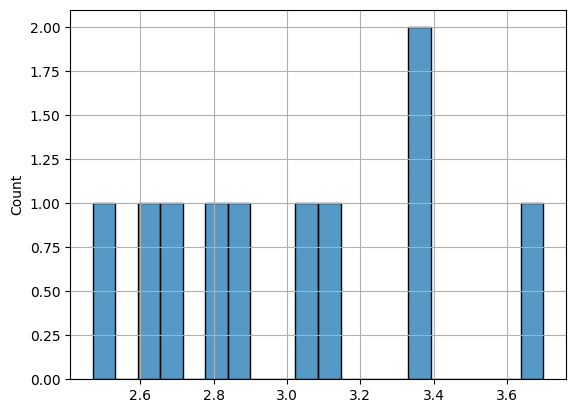

In [9]:
n = 5
N = 10
means = [tips_df.sample(n=n, replace=True)["tip"].mean() for i in range(N)]
sns.histplot(means, bins=20)
plt.grid(True)
plt.show();

* Now, keep $N$ constant, increase $n$ and observe. What do you conclude?

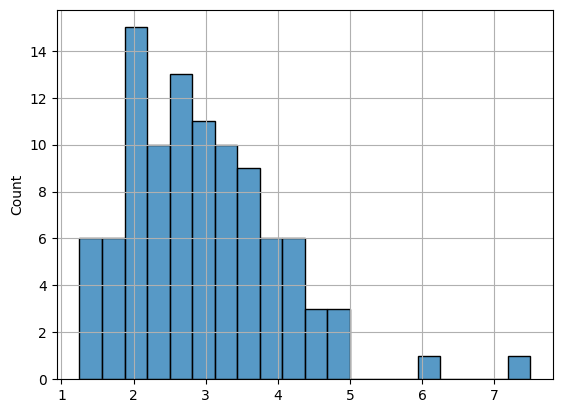

In [10]:
n = 2 
N = 100
means = [tips_df.tip.sample(n, replace=True).mean() for i in range(N)]

sns.histplot(means, bins=20)
plt.grid(True)
plt.show();

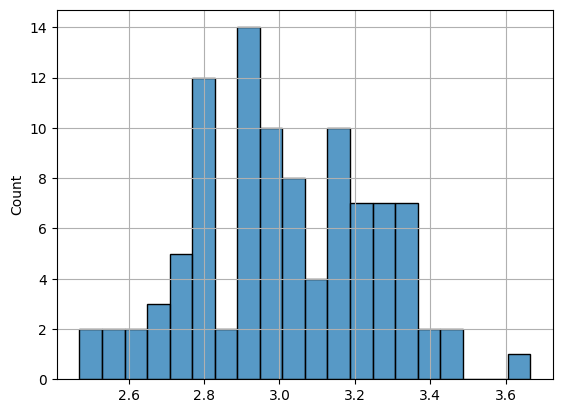

In [11]:
n = 30 # CLT applies mostly with n greater than 30
N = 100
means = [tips_df.tip.sample(n, replace=True).mean() for i in range(N)]

sns.histplot(means, bins=20)
plt.grid(True)
plt.show();

### 3.2) <u>Numerically</u>

❓ Let's verify the Central Limit Theorem computationally ❓
- Compare `tips_mu` with the mean of means
- Compare `tips_sigma` with the standard deviation of the means, but don't forget the $\sqrt n$ adjustment
- Compute the `skewness` of the distribution of the means using `scipy.stats.skew` (should be close to 0)
- Compute the `kurtosis` of the distribution of the means using `scipy.stats.kurtosis`(should be close to 0)


In [12]:
from scipy.stats import skew, kurtosis
from scipy.stats import skew, kurtosis

mean_of_means = np.mean(means)

std_of_means = np.std(means) / np.sqrt(n)

means_skewness = skew(means)

means_kurtosis = kurtosis(means)

tips_mu, tips_sigma, means_skewness, means_kurtosis, std_of_means, mean_of_means


(2.99827868852459,
 1.3836381890011822,
 0.036198726472739834,
 -0.35904978687397326,
 0.0431131179487086,
 3.013640000000001)

## 💪  4) Use case: Probabilities of accumulating large tips at the end of a work-day

🤔 Let's pick 100 meals from the dataset, sampling with replacement. What is the probability that the cumulated tips ends up being **greater than 350€**?


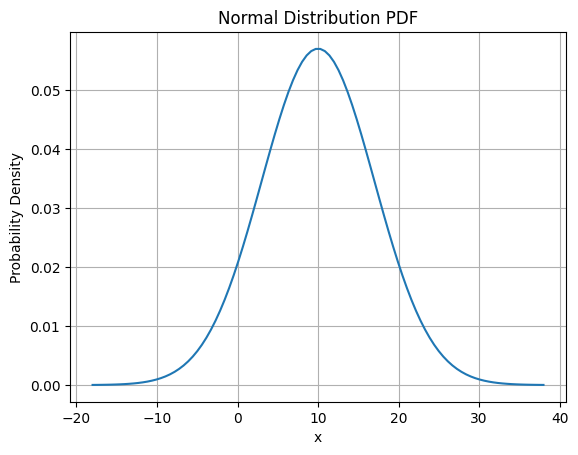

In [13]:
from scipy.stats import norm

mu_example = 10
sigma_example = 7

x = np.linspace(mu_example - 4*sigma_example, mu_example + 4*sigma_example, 100)
pdf = (1 / (sigma_example * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu_example) / sigma_example)**2)


plt.plot(x, pdf)
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Normal Distribution PDF")
plt.grid(True)
plt.show()

The **probability density function** (_a.k.a._ ***pdf***) of a Normal Distribution with parameters $ \mu $ and $ \sigma $ is defined by:

$$ y = \frac{1}{\sigma \sqrt{2 \pi}} exp[-\frac{1}{2} (\frac{x - \mu}{\sigma})^2]$$

😅 Without this function from Scipy, you would have to define a _Gaussian Probability Density Function_ by yourself to plot the Gaussian Curve.

In [14]:
def gaussian_probability_density_function(mu,sigma, x):
    return 1/(sigma * np.sqrt(2*(math.pi))) * np.exp(- (1/2)*((x-mu)/sigma)**2) 

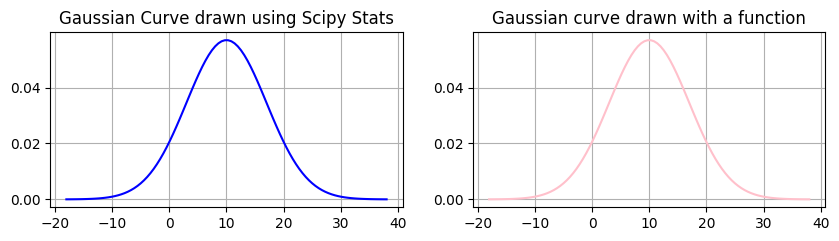

In [15]:
mu_example = 10
sigma_example = 7

# start a figure
plt.figure(figsize=(10,5))

# First subplot :
# Plotting a Gaussian distribution using Scipy Stats
plt.subplot(2,2,1)
plt.grid(True)
plt.plot(x, norm(mu_example, sigma_example).pdf(x), c="blue")
plt.title("Gaussian Curve drawn using Scipy Stats");

# Second subplot :
# Plotting a Gaussian distribution using our own Python function
plt.subplot(2,2,2)
plt.plot(x, gaussian_probability_density_function(mu_example, sigma_example, x), c="pink")
plt.grid(True)
plt.title("Gaussian curve drawn with a function");

### ❓ Plot this expected distribution
- On top of it, add the datapoint representing a cumulated tip of 350€ over 100 meals.

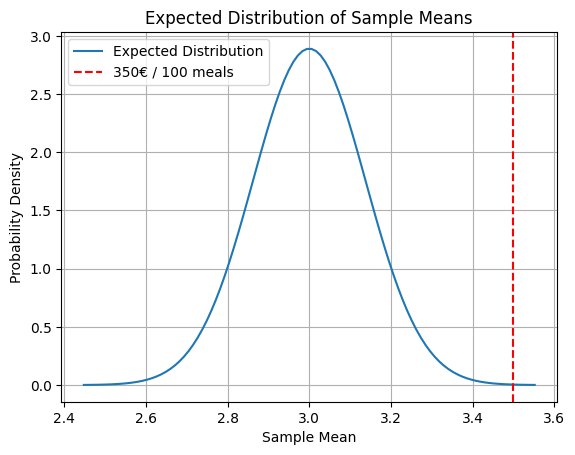

In [16]:
mu = 3
sigma = 1.38
n = 100

mu_expected = mu
sigma_expected = sigma / np.sqrt(n)

x = np.linspace(mu_expected - 4 * sigma_expected, mu_expected + 4 * sigma_expected, 100)
pdf = (1 / (sigma_expected * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu_expected) / sigma_expected) ** 2)


plt.plot(x, pdf, label="Expected Distribution")
plt.xlabel("Sample Mean")
plt.ylabel("Probability Density")
plt.title("Expected Distribution of Sample Means")
plt.grid(True)
plt.axvline(x=350 / n, color="red", linestyle="--", label="350€ / 100 meals")
plt.legend()
plt.show()

👉 For this restaurant, we clearly see that 350 euros of cumulated tips over 100 meals (average tip of 3.50 euros) seems to be is virtually impossible (this probability of this event would be close to zero).

🍔 It is probably a cheap restaurant serving burgers and fries until 4 AM...

We are almost at the end of the challenge!

🔢 Let's denote $ \bar{X} $ the average tip over 100 meals 

* ❓ Compute numerically $ \mathbb{P} ( \bar{X} > 3.50 ) $ and store it in `proba_350` variable ❓
* 📚 You will need the **`cumulative distribution function (cdf)`** from [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [17]:
mu_expected = tips_mu
sigma_expected = tips_sigma / np.sqrt(n)

z_score = (3.50 - tips_mu) / (tips_sigma / np.sqrt(n))
proba_350 = 1 - norm.cdf(z_score)

proba_350, mu_expected, sigma_expected

(0.00014386590520809595, 2.99827868852459, 0.13836381890011823)

## ⭐️  5) The `z-score`

<u>**Alternative computation using z-score**</u>

🤔 Imagine you didn't have access to the `SciPy` library (or even to a computer) to compute the probability density function of a custom-made Gaussian distribution numerically. Which workaround could we use to this end?  

💡 Instead of computing a Gaussian distribution with specific mean and sigma, a much more elegant way is to rephrase our problem to use the **`Standard Normal distribution`** $\mathcal N(0,1)$, from which we could read usual values in a **`Standard Statistical table`** 👇

$$ X \sim \mathcal N(\mu,\sigma) \leftrightarrow Y =  \frac{X - \mu}{\sigma} \sim \mathcal N(0,1) $$

In [18]:
mu = 3
sigma = 1.38
n = 100
x = 3.5
z = (x - mu) / (sigma / np.sqrt(n))
z

3.623188405797102

❓ Double-check this probability with with `scipy.stats.norm` as done previously. Store it into a `proba_z` variable.

In [19]:
proba_z = 1 - norm.cdf(z)
proba_z

0.0001454968507480503